## read diagnose information from data/DIAGNOSES_ICD.csv

In [1]:
import pandas as pd
diagnose_df = pd.read_csv('../../data/DIAGNOSES_ICD.csv', sep=',', encoding='latin1')
diagnose_df[:10]


,ROW_ID,SUBJECT_ID,HADM_ID,SEQ_NUM,ICD9_CODE
0,1297,109,172335,1.0,40301
1,1298,109,172335,2.0,486
2,1299,109,172335,3.0,58281
3,1300,109,172335,4.0,5855
4,1301,109,172335,5.0,4254
5,1302,109,172335,6.0,2762
6,1303,109,172335,7.0,7100
7,1304,109,172335,8.0,2767
8,1305,109,172335,9.0,7243
9,1306,109,172335,10.0,45829


## Read definition of ICD9_CODE from D_ICD_DIAGNOSES.csv

In [2]:
icd9_code_df = pd.read_csv('../../data/D_ICD_DIAGNOSES.csv', sep=',', encoding='latin1')
icd9_code_df[:10]

,ROW_ID,ICD9_CODE,SHORT_TITLE,LONG_TITLE
0,174,01166,TB pneumonia-oth test,"Tuberculous pneumonia [any form], tubercle bac..."
1,175,01170,TB pneumothorax-unspec,"Tuberculous pneumothorax, unspecified"
2,176,01171,TB pneumothorax-no exam,"Tuberculous pneumothorax, bacteriological or h..."
3,177,01172,TB pneumothorx-exam unkn,"Tuberculous pneumothorax, bacteriological or h..."
4,178,01173,TB pneumothorax-micro dx,"Tuberculous pneumothorax, tubercle bacilli fou..."
5,179,01174,TB pneumothorax-cult dx,"Tuberculous pneumothorax, tubercle bacilli not..."
6,180,01175,TB pneumothorax-histo dx,"Tuberculous pneumothorax, tubercle bacilli not..."
7,181,01176,TB pneumothorax-oth test,"Tuberculous pneumothorax, tubercle bacilli not..."
8,182,01180,Pulmonary TB NEC-unspec,"Other specified pulmonary tuberculosis, unspec..."
9,183,01181,Pulmonary TB NEC-no exam,"Other specified pulmonary tuberculosis, bacter..."


## Join Two Dataframe on ICD9_CODE

In [3]:
dignoses_detailed_df = pd.merge(diagnose_df, icd9_code_df, how='left', on=['ICD9_CODE'])

In [4]:
dignoses_detailed_df.sort_values(by='SUBJECT_ID')[:10]

,ROW_ID_x,SUBJECT_ID,HADM_ID,SEQ_NUM,ICD9_CODE,ROW_ID_y,SHORT_TITLE,LONG_TITLE
608,1,2,163353,1.0,V3001,13695.0,Single lb in-hosp w cs,"Single liveborn, born in hospital, delivered b..."
609,2,2,163353,2.0,V053,12202.0,Need prphyl vc vrl hepat,Need for prophylactic vaccination and inoculat...
610,3,2,163353,3.0,V290,13688.0,NB obsrv suspct infect,Observation for suspected infectious condition
619,12,3,145834,9.0,2639,1642.0,Protein-cal malnutr NOS,Unspecified protein-calorie malnutrition
617,10,3,145834,7.0,6826,7283.0,Cellulitis of leg,"Cellulitis and abscess of leg, except foot"
616,9,3,145834,6.0,4280,4473.0,CHF NOS,"Congestive heart failure, unspecified"
615,8,3,145834,5.0,41071,4357.0,"Subendo infarct, initial","Subendocardial infarction, initial episode of ..."
618,11,3,145834,8.0,4254,4435.0,Prim cardiomyopathy NEC,Other primary cardiomyopathies
613,6,3,145834,3.0,5849,5908.0,Acute kidney failure NOS,"Acute kidney failure, unspecified"
612,5,3,145834,2.0,78559,12992.0,Shock w/o trauma NEC,Other shock without mention of trauma


## Select Data of 4280 Code (Congestive heart failure)

In [5]:
d_filtered = dignoses_detailed_df[dignoses_detailed_df.ICD9_CODE == '4280']

In [6]:
d_filtered[:10]

,ROW_ID_x,SUBJECT_ID,HADM_ID,SEQ_NUM,ICD9_CODE,ROW_ID_y,SHORT_TITLE,LONG_TITLE
51,1511,115,114585,10.0,4280,4473.0,CHF NOS,"Congestive heart failure, unspecified"
67,1527,117,140784,5.0,4280,4473.0,CHF NOS,"Congestive heart failure, unspecified"
153,1613,124,138376,15.0,4280,4473.0,CHF NOS,"Congestive heart failure, unspecified"
211,1671,130,198214,2.0,4280,4473.0,CHF NOS,"Congestive heart failure, unspecified"
321,550,68,108329,10.0,4280,4473.0,CHF NOS,"Congestive heart failure, unspecified"
327,556,68,170467,5.0,4280,4473.0,CHF NOS,"Congestive heart failure, unspecified"
391,620,77,142768,2.0,4280,4473.0,CHF NOS,"Congestive heart failure, unspecified"
604,833,105,128744,3.0,4280,4473.0,CHF NOS,"Congestive heart failure, unspecified"
616,9,3,145834,6.0,4280,4473.0,CHF NOS,"Congestive heart failure, unspecified"
651,44,9,150750,3.0,4280,4473.0,CHF NOS,"Congestive heart failure, unspecified"


In [7]:
# Patients who are diagnosed as congestive heart failure
final_label_df = d_filtered[['SUBJECT_ID']]
final_label_df['CONGESTIVE_HEART_FAILURE'] = '1' 

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [8]:
final_label_df[:10]

,SUBJECT_ID,CONGESTIVE_HEART_FAILURE
51,115,1
67,117,1
153,124,1
211,130,1
321,68,1
327,68,1
391,77,1
604,105,1
616,3,1
651,9,1


## Feature Data (Use Labevents rather than Charevents)

In [9]:
labevent_df = pd.read_csv('../../data/LABEVENTS.csv', sep=',', encoding='latin1', parse_dates=['CHARTTIME'], dayfirst=True)
labevent_df[:10]

,ROW_ID,SUBJECT_ID,HADM_ID,ITEMID,CHARTTIME,VALUE,VALUENUM,VALUEUOM,FLAG
0,281,3,NaN,50820,2101-10-12 16:07:00,7.39,7.39,units,NaN
1,282,3,NaN,50800,2101-10-12 18:17:00,ART,NaN,NaN,NaN
2,283,3,NaN,50802,2101-10-12 18:17:00,-1,-1.00,mEq/L,NaN
3,284,3,NaN,50804,2101-10-12 18:17:00,22,22.00,mEq/L,NaN
4,285,3,NaN,50808,2101-10-12 18:17:00,0.93,0.93,mmol/L,abnormal
5,286,3,NaN,50812,2101-10-12 18:17:00,NOT INTUBATED,NaN,NaN,NaN
6,287,3,NaN,50813,2101-10-12 18:17:00,1.8,1.80,mmol/L,NaN
7,288,3,NaN,50818,2101-10-12 18:17:00,33,33.00,mm Hg,NaN
8,289,3,NaN,50820,2101-10-12 18:17:00,7.42,7.42,units,NaN
9,290,3,NaN,50821,2101-10-12 18:17:00,80,80.00,mm Hg,NaN


In [10]:
labevent_items_df = pd.read_csv('../../data/D_LABITEMS.csv', sep=',', encoding='latin1')
labevet_detailed_df = pd.merge(labevent_df, labevent_items_df, how='left', on=['ITEMID'])
labevet_detailed_df.sort_values(by='SUBJECT_ID')[:10]

,ROW_ID_x,SUBJECT_ID,HADM_ID,ITEMID,CHARTTIME,VALUE,VALUENUM,VALUEUOM,FLAG,ROW_ID_y,LABEL,FLUID,CATEGORY,LOINC_CODE
613,19,2,163353.0,51137,2138-07-17 21:10:00,1+,NaN,NaN,NaN,337,Anisocytosis,Blood,Hematology,702-1
615,21,2,163353.0,51144,2138-07-17 21:10:00,1,1.0,%,NaN,344,Bands,Blood,Hematology,763-3
616,22,2,163353.0,51146,2138-07-17 21:10:00,0,0.0,%,NaN,346,Basophils,Blood,Hematology,704-7
617,23,2,163353.0,51200,2138-07-17 21:10:00,0,0.0,%,NaN,400,Eosinophils,Blood,Hematology,711-2
618,24,2,163353.0,51221,2138-07-17 21:10:00,49.6,49.6,%,NaN,421,Hematocrit,Blood,Hematology,4544-3
619,25,2,163353.0,51222,2138-07-17 21:10:00,16.5,16.5,g/dL,abnormal,422,Hemoglobin,Blood,Hematology,718-7
620,26,2,163353.0,51233,2138-07-17 21:10:00,NORMAL,NaN,NaN,NaN,433,Hypochromia,Blood,Hematology,728-6
621,27,2,163353.0,51244,2138-07-17 21:10:00,19,19.0,%,abnormal,444,Lymphocytes,Blood,Hematology,731-0
622,28,2,163353.0,51246,2138-07-17 21:10:00,1+,NaN,NaN,NaN,446,Macrocytes,Blood,Hematology,738-5
623,29,2,163353.0,51248,2138-07-17 21:10:00,34.4,34.4,pg,abnormal,448,MCH,Blood,Hematology,785-6


In [202]:
feature_filtered_df = labevet_detailed_df[(labevet_detailed_df.ITEMID == 51222)] 

In [203]:
final_feature_df = feature_filtered_df[['SUBJECT_ID','CHARTTIME','VALUENUM']]
# Remove Nan data
final_feature_df = final_feature_df[final_feature_df.VALUENUM.notna()]
final_feature_df[:10]

,SUBJECT_ID,CHARTTIME,VALUENUM
54,3,2101-10-14 03:00:00,10.3
94,3,2101-10-15 03:30:00,9.9
129,3,2101-10-16 04:00:00,10.2
192,3,2101-10-22 04:00:00,9.5
360,3,2101-10-23 03:45:00,10.5
415,3,2101-10-20 19:26:00,7.8
450,3,2101-10-20 19:59:00,8.2
523,3,2101-10-20 16:40:00,10.0
600,2,2138-07-17 20:48:00,0.0
619,2,2138-07-17 21:10:00,16.5


In [204]:
final_feature_df['CHAR_DATE'] = final_feature_df['CHARTTIME'].dt.date
final_feature_df[:10]

,SUBJECT_ID,CHARTTIME,VALUENUM,CHAR_DATE
54,3,2101-10-14 03:00:00,10.3,2101-10-14
94,3,2101-10-15 03:30:00,9.9,2101-10-15
129,3,2101-10-16 04:00:00,10.2,2101-10-16
192,3,2101-10-22 04:00:00,9.5,2101-10-22
360,3,2101-10-23 03:45:00,10.5,2101-10-23
415,3,2101-10-20 19:26:00,7.8,2101-10-20
450,3,2101-10-20 19:59:00,8.2,2101-10-20
523,3,2101-10-20 16:40:00,10.0,2101-10-20
600,2,2138-07-17 20:48:00,0.0,2138-07-17
619,2,2138-07-17 21:10:00,16.5,2138-07-17


In [205]:
import numpy as np
final_feature_bydate_df = final_feature_df.groupby(['SUBJECT_ID','CHAR_DATE']).agg({"VALUENUM": "mean"})

final_feature_bydate_df = final_feature_bydate_df.reset_index().sort_values(by=['SUBJECT_ID','CHAR_DATE'])

final_feature_bydate_df['SHIFT_DATE'] = final_feature_bydate_df.groupby('SUBJECT_ID')['CHAR_DATE'].apply(lambda i:i.shift(1))
final_feature_bydate_df[:10]

,SUBJECT_ID,CHAR_DATE,VALUENUM,SHIFT_DATE
0,2,2138-07-17,8.250000,NaN
1,3,2101-10-04,11.500000,NaN
2,3,2101-10-05,11.000000,2101-10-04
3,3,2101-10-06,10.900000,2101-10-05
4,3,2101-10-07,10.600000,2101-10-06
5,3,2101-10-11,9.700000,2101-10-07
6,3,2101-10-14,10.300000,2101-10-11
7,3,2101-10-15,9.900000,2101-10-14
8,3,2101-10-16,10.200000,2101-10-15
9,3,2101-10-20,8.666667,2101-10-16


In [206]:
final_feature_bydate_df['DATE_INTERVAL'] = (final_feature_bydate_df['CHAR_DATE']
                                           - final_feature_bydate_df['SHIFT_DATE']).dt.days

## remove those subjects not in feature dataframe


In [207]:
final_label_df = final_label_df[final_label_df['SUBJECT_ID'].isin(final_feature_bydate_df['SUBJECT_ID'])]

In [208]:
subject_label = {}
subject_label = final_label_df.set_index('SUBJECT_ID').to_dict('index')
for key in subject_label:
    subject_label[key] = subject_label[key]['CONGESTIVE_HEART_FAILURE']

In [209]:
num_attrs = 25
current_vector = np.zeros(num_attrs, dtype=float)
current_index = 0
current_subject = final_feature_bydate_df["SUBJECT_ID"][0]
subject_dict = {}


for index, row in final_feature_bydate_df.iterrows():
    # if not in the begining of a group, increase index by date interval
    if not (pd.isnull(row["DATE_INTERVAL"])):
        current_index += row["DATE_INTERVAL"]
        
    if row["SUBJECT_ID"] != current_subject: 

        subject_dict[current_subject] = current_vector
        current_vector = np.zeros(num_attrs, dtype=float)
        if current_subject not in subject_label:
            subject_label[current_subject]= '0'
        
        current_index = 0
        current_subject = row["SUBJECT_ID"]
        
    if current_index >= 25: continue
    current_vector[int(current_index)]= row["VALUENUM"]

subject_dict[current_subject] = current_vector
if current_subject not in subject_label:
    subject_label[current_subject]='0'

## t-SNE

In [286]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import random

max_train = 5000
train_dict_keys = random.sample(list(subject_dict.keys()), max_train)
## Get X and y
X = np.empty(shape=(max_train,max_attrs))
y = np.empty(shape=(max_train))

i=0
for k in train_dict_keys:
    X[i]=subject_dict[k]
    y[i]=subject_label[k]
    i+=1   
    
X_embedded = TSNE(n_components=2, learning_rate=3000).fit_transform(X)

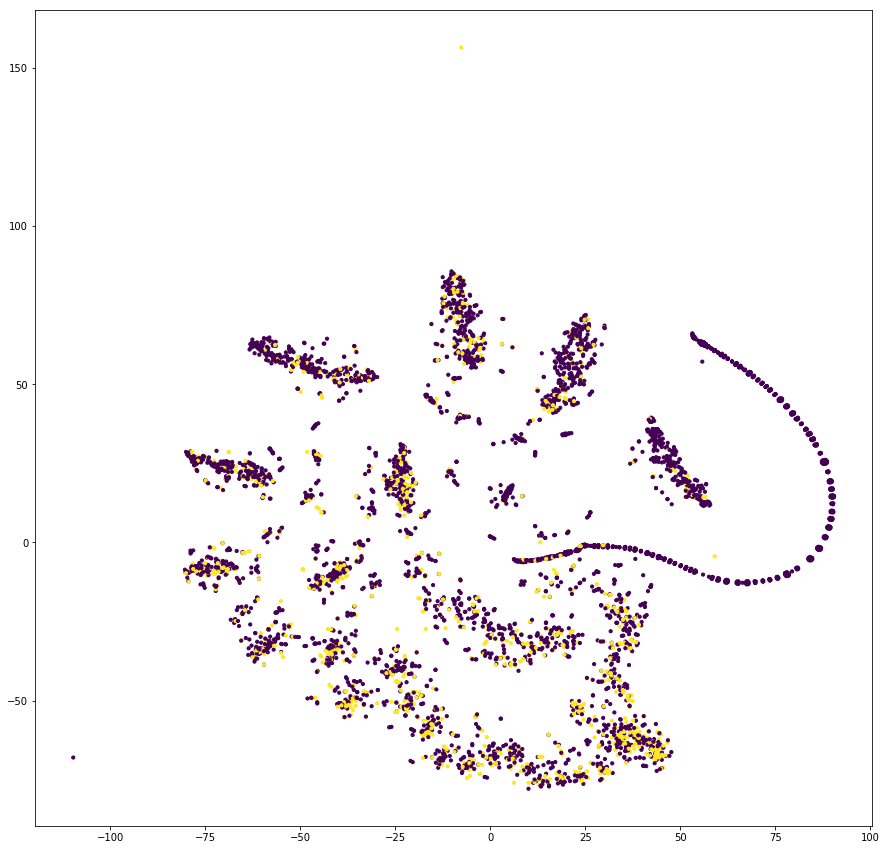

In [287]:
plt.figure(figsize=(15, 15))
plt.scatter(X_embedded[:,0],X_embedded[:,1],c=y, s=10, alpha = 1)

plt.show()